In [0]:
#Bhargav Muktevi ,Chaitanya Upadrasta, Sharanya Hunasamranahalli Thotadarya



In [0]:
import numpy as np
import os
import tensorflow as tf
from time import time
from google.colab import drive

In [0]:
drive.mount('/content/drive/')
%cd 'drive/My Drive/Colab Notebooks'

from datasets import MNISTDataset
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


11493376/11490434 [==============================] - 0s 0us/step
5
5


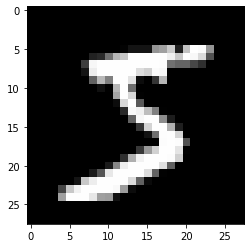

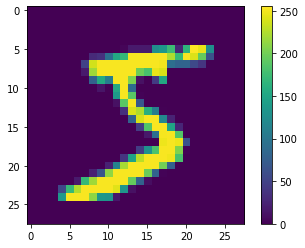

(60000, 28, 28)
60000
5


In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

# Normalize pixel values to be between 0 and 1

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# note: we batch the test data, but do not shuffle/repeat
# first difference: data is not reshaped to 784 anymore, but 28x28x1
# note the 1 color channel!! this is important

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1,28,28,1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
#[28,28,1]image size 28*28 channel=1

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1,28,28,1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)
print(train_images.shape)
print(len(train_labels))
print(train_labels[0])

# note: we batch the test data, but do not shuffle/repeat


In [0]:
train_steps = 1000
model = models.Sequential()
#32filter size (3,3)kernel size
model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1),strides=1,padding='same',kernel_initializer=tf.random_uniform_initializer(-0.1,0.1),bias_initializer='zeros'))
model.add(layers.MaxPooling2D((2, 2),strides=2,padding='same'))
model.add(layers.Conv2D(32, (5, 5), activation='relu',strides=1,padding='same',kernel_initializer=tf.random_uniform_initializer(-0.1,0.1),bias_initializer='zeros'))
model.add(layers.MaxPooling2D((2, 2),strides=2,padding='same'))
#model.add(layers.Conv2D(30, (3, 3), activation='relu',strides=1,padding='same',kernel_initializer=tf.random_uniform_initializer(-0.1,0.1),bias_initializer='zeros'))
#model.add(layers.MaxPooling2D((2, 2),strides=2,padding='same'))





In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
Total params: 13,248
Trainable params: 13,248
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(10,use_bias=True,kernel_initializer=tf.random_uniform_initializer(-0.1,0.1),bias_initializer='zeros'))


In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                15690     
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
__________________________________________________

In [0]:
# Adam makes things much smoother
opt = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()
    

Loss: 2.3417270183563232 Accuracy: 0.046875
Loss: 0.27154675126075745 Accuracy: 0.7966406345367432
Loss: 0.14409630000591278 Accuracy: 0.9409375190734863
Loss: 0.12165956944227219 Accuracy: 0.9564062356948853
Loss: 0.036644067615270615 Accuracy: 0.9658593535423279
Loss: 0.09890809655189514 Accuracy: 0.9741541147232056
Loss: 0.07732634246349335 Accuracy: 0.9748437404632568
Loss: 0.05273370072245598 Accuracy: 0.9779687523841858
Loss: 0.12340090423822403 Accuracy: 0.9807812571525574
Loss: 0.016987498849630356 Accuracy: 0.9767187237739563
Loss: 0.0640164166688919 Accuracy: 0.982377827167511


In [0]:
# this is very convenient -- before, we usually had code that
# evaluates the whole test set at once -- this won't work for
# large datasets/models. With metrics, we can just iterate
# over the data and the metric takes care of averaging etc.

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9825999736785889


In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 
 #5*5 filter,channel size,filetrs

conv2d_9 (5, 5, 1, 16)
conv2d_10 (5, 5, 16, 32)


dense_2  -  32  filters


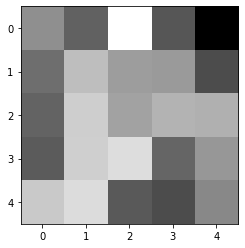

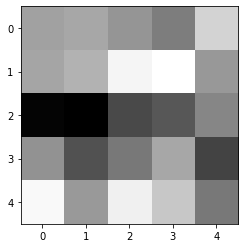

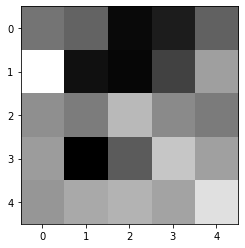

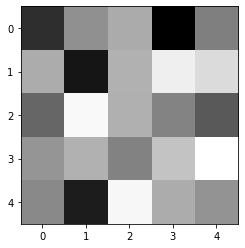

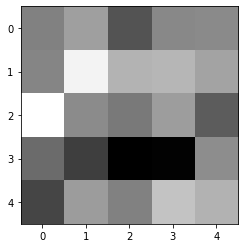

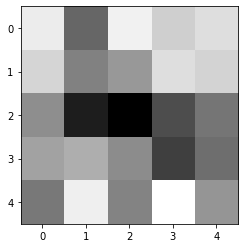

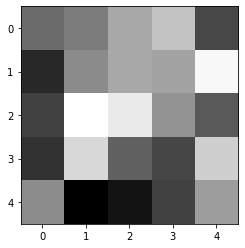

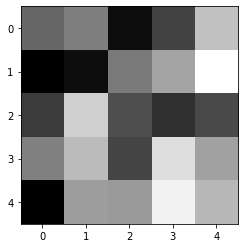

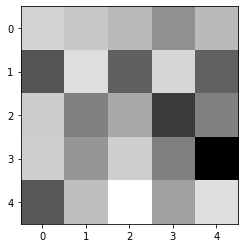

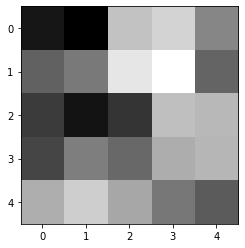

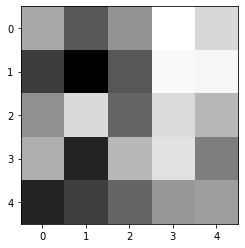

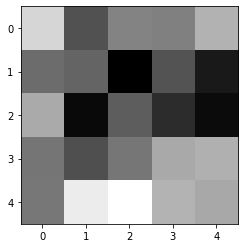

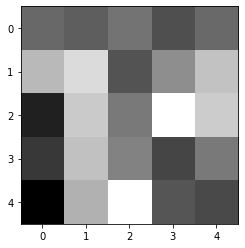

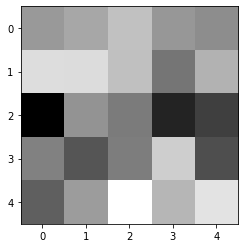

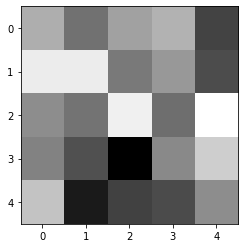

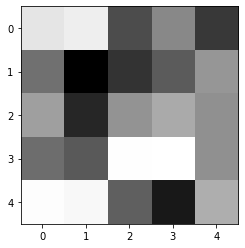

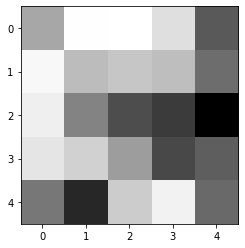

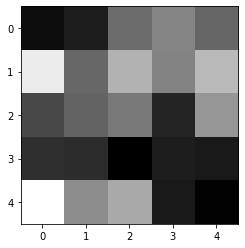

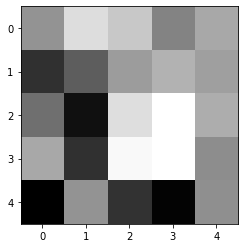

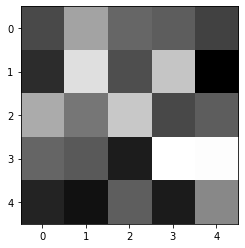

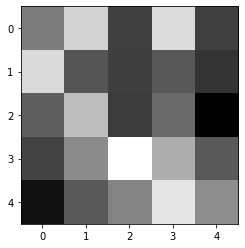

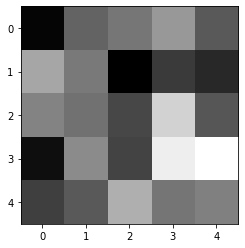

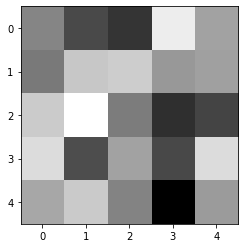

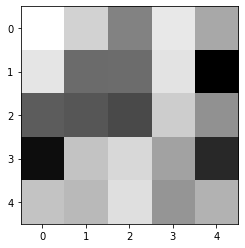

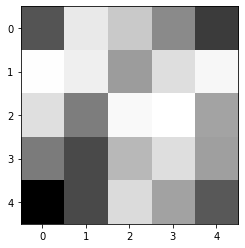

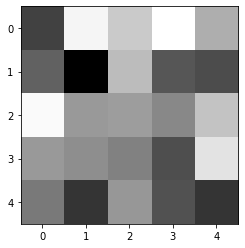

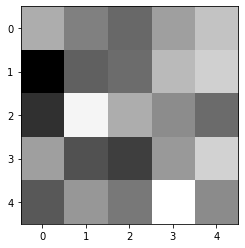

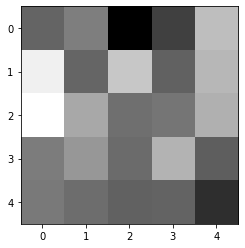

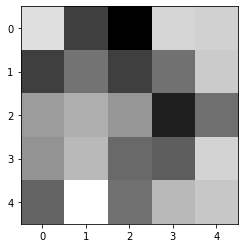

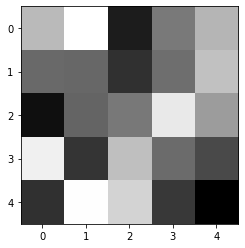

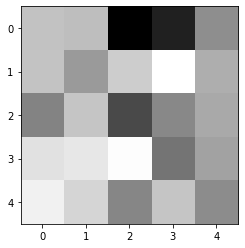

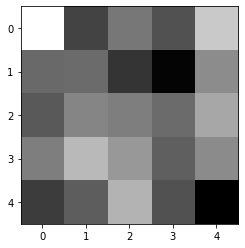

In [0]:

from matplotlib import pyplot
# retrieve weights from the second hidden layer


ix=1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


h,w,c,f = filters.shape
print(f)
print(layer.name,' - ',f,' filters')
for i in range(f):
		#get the filter
    f = filters[:,:,:,i]
    plt.imshow(f[:,:,0], cmap='gray')
    plt.show()
    

    ix += 1




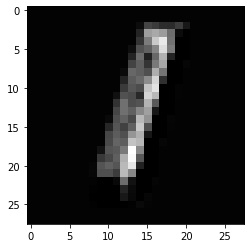

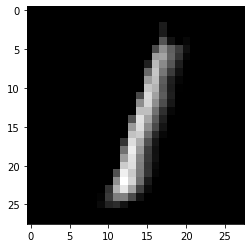

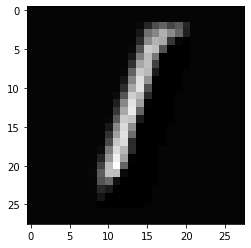

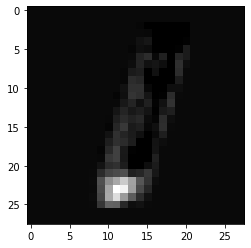

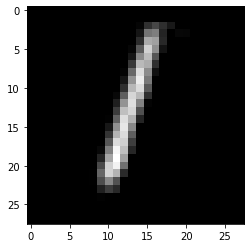

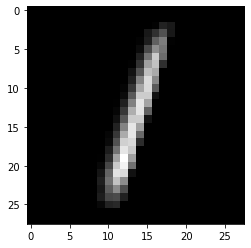

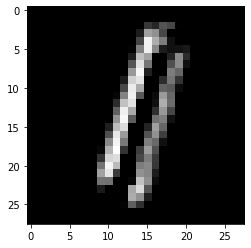

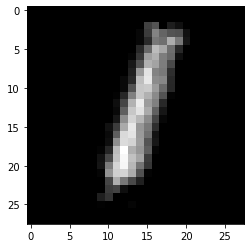

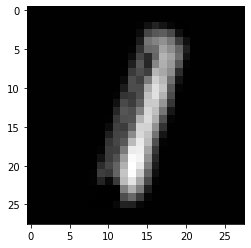

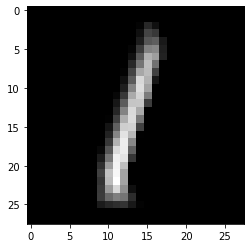

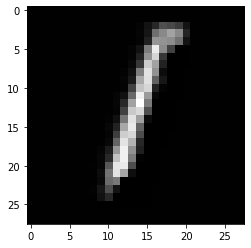

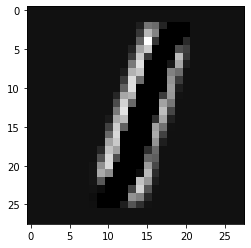

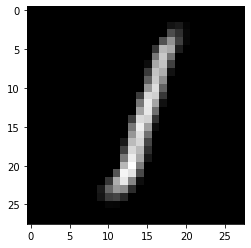

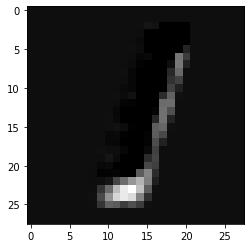

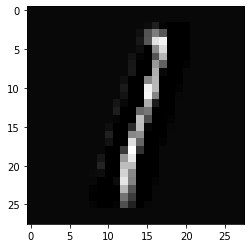

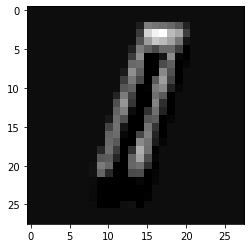

In [0]:
model_fm = tf.keras.Sequential(tf.keras.layers.Conv2D(16,(5,5),activation='relu', input_shape=(28, 28, 1), padding='SAME', weights=model.layers[0].get_weights()))
fm = model_fm.predict(test_images[2].reshape([-1, 28, 28, 1]).astype(np.float32) / 255)

for i in range(16):
    plt.imshow(fm[0, :, :, i], cmap='gray')
    plt.show()

OBSERVATIONS:


1)On using the filters of image size we observed accuracy of 99% on train and test


+++++++++++++++++++++++++++++++++++++++++++++++


CIFAR10


Using TensorFlow backend.


[9]


(50000, 32, 32, 3)

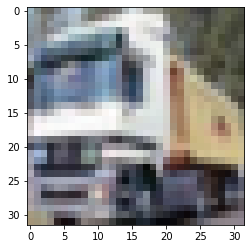

In [0]:
from keras.preprocessing.image import ImageDataGenerator
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

print(train_labels[1])
plt.imshow(train_images[1])
train_images.shape

In [0]:
train_images=train_images.reshape([-1, 32,32,3]).astype(np.float32) / 255
train_labels=train_labels.astype(np.int32)
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(train_images)

In [0]:
(len(train_images)/128)*10

3906.25

In [0]:
layer_list = [
              
              tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),      
              #tf.keras.layers.Conv2D(filters=32,kernel_size=2,strides=2,padding='same',activation=tf.nn.relu),
              #tf.keras.layers.BatchNormalization(),
              tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
              tf.keras.layers.Dropout(0.2),

              
              tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              #tf.keras.layers.Conv2D(filters=64,kernel_size=2,strides=2,padding='same',activation=tf.nn.relu),
              #tf.keras.layers.BatchNormalization(),      
              tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
              tf.keras.layers.Dropout(0.2),

              tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation=tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
              #tf.keras.layers.Conv2D(filters=32,kernel_size=2,strides=2,padding='same',activation=tf.nn.relu),
              #tf.keras.layers.BatchNormalization(),
              tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
              tf.keras.layers.Dropout(0.2),


             
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128,tf.nn.relu),
              tf.keras.layers.BatchNormalization(),
           
              tf.keras.layers.Dense(10)]  # default is no activation

model = tf.keras.Sequential(layer_list)
opt = tf.optimizers.Adam(0.001)
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)


In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
epochs=20
batch=0
for  (img_batch, lbl_batch) in (datagen.flow(train_images, train_labels,batch_size=400)):
  batch=batch+1
  if batch >= (len(train_images) / 400)*epochs:
    break
  with tf.GradientTape() as tape:
    logits = model(img_batch)
    # loss format is generally: first argument targets, second argument outputs
    xent = loss_fn(lbl_batch, logits)
  varis = model.trainable_variables
  grads = tape.gradient(xent, varis)
    
  opt.apply_gradients(zip(grads, varis))
  
  train_acc_metric(lbl_batch, logits)
  if not batch % 100:
    #print(img_batch.shape)
    # this is different from before. there, we only evaluated accuracy
    # for one batch. Now, we always average over 100 batches
    print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
    train_acc_metric.reset_states()


Loss: 1.5815672874450684 Accuracy: 0.31372499465942383
Loss: 1.3209477663040161 Accuracy: 0.48054999113082886
Loss: 1.1621354818344116 Accuracy: 0.5648499727249146
Loss: 1.027564525604248 Accuracy: 0.619949996471405
Loss: 0.8262730240821838 Accuracy: 0.6475250124931335
Loss: 0.8533413410186768 Accuracy: 0.6800000071525574
Loss: 0.8919576406478882 Accuracy: 0.6963000297546387
Loss: 0.7550668120384216 Accuracy: 0.7174999713897705
Loss: 0.6758428812026978 Accuracy: 0.7316250205039978
Loss: 0.7036917209625244 Accuracy: 0.7450249791145325
Loss: 0.6111648678779602 Accuracy: 0.7559750080108643
Loss: 0.6102247834205627 Accuracy: 0.7664250135421753
Loss: 0.6284443736076355 Accuracy: 0.7734000086784363
Loss: 0.5782389640808105 Accuracy: 0.7883999943733215
Loss: 0.5719050168991089 Accuracy: 0.7928749918937683
Loss: 0.6225379705429077 Accuracy: 0.8004249930381775
Loss: 0.5786443948745728 Accuracy: 0.8049499988555908
Loss: 0.5125032663345337 Accuracy: 0.8100249767303467
Loss: 0.5414859652519226 Acc

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           multiple                  896       
_________________________________________________________________
batch_normalization (BatchNo multiple                  128       
_________________________________________________________________
conv2d_13 (Conv2D)           multiple                  9248      
_________________________________________________________________
batch_normalization_1 (Batch multiple                  128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
conv2d_14 (Conv2D)           multiple                 

In [0]:
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(1000)

In [0]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))

print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.8012999892234802


In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
 
 #5*5 filter,channel size,filetrs

conv2d_12 (3, 3, 3, 32)
conv2d_13 (3, 3, 32, 32)
conv2d_14 (3, 3, 32, 64)
conv2d_15 (3, 3, 64, 64)
conv2d_16 (3, 3, 64, 128)
conv2d_17 (3, 3, 128, 128)


dense_4  -  128  filters


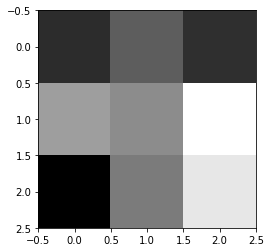

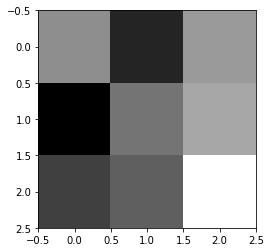

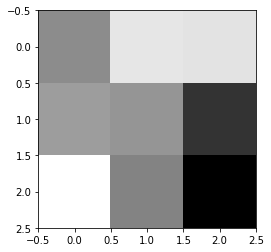

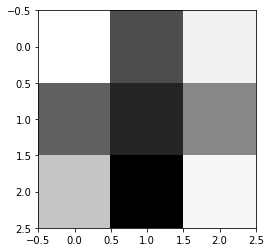

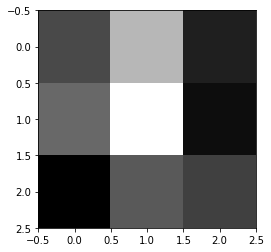

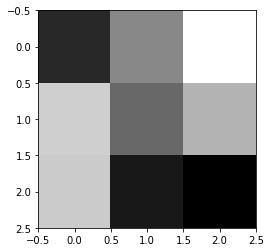

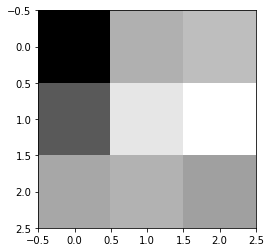

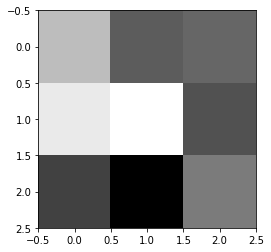

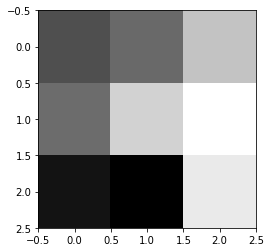

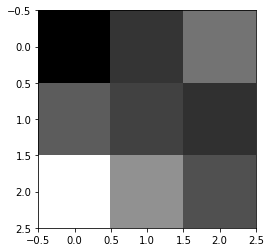

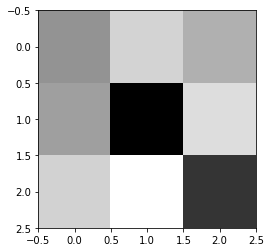

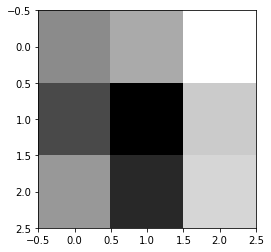

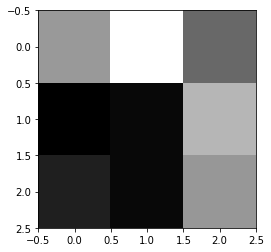

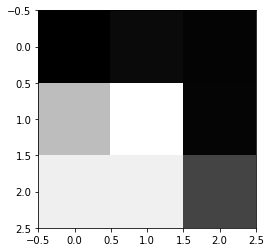

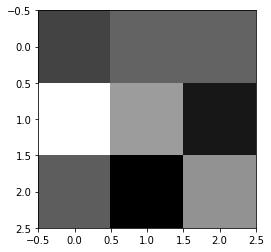

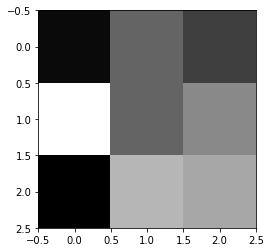

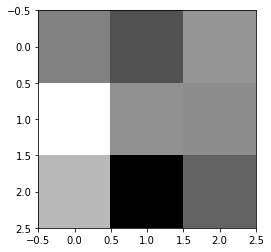

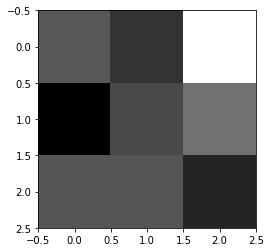

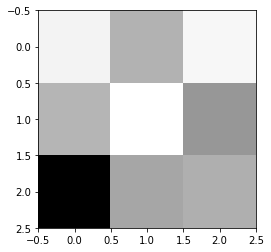

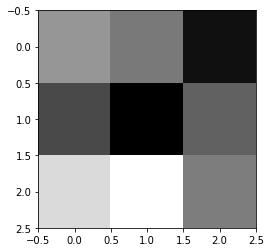

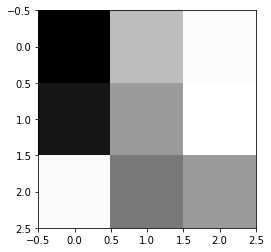

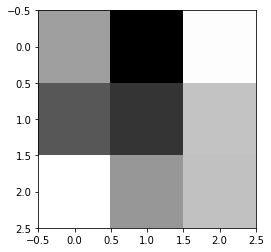

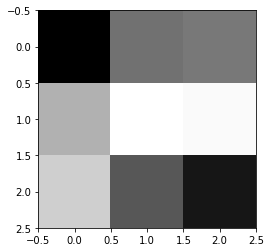

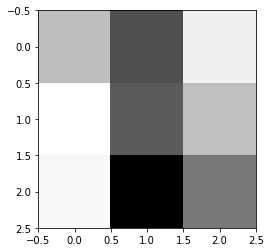

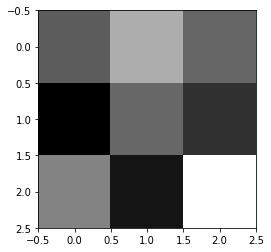

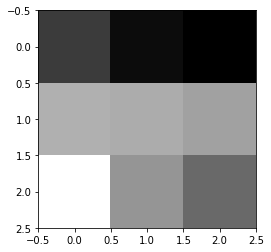

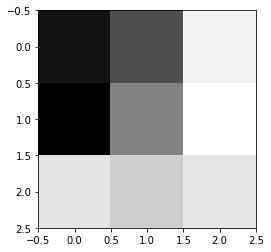

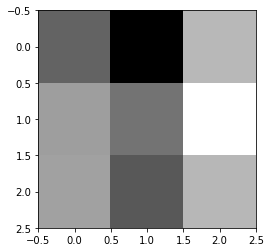

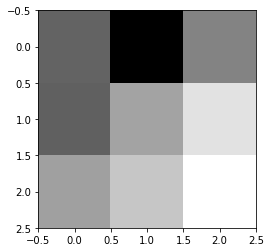

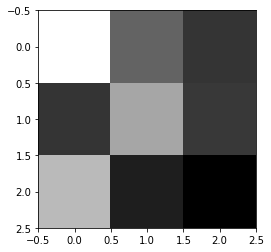

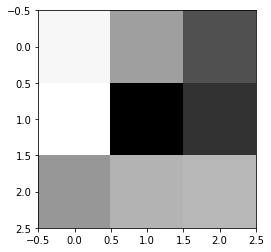

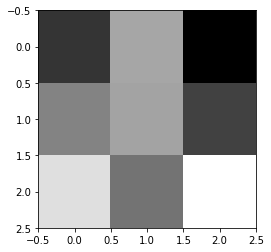

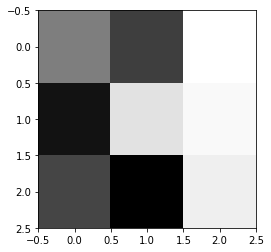

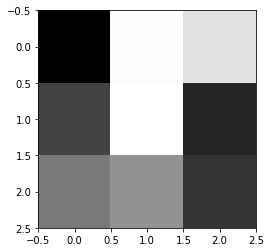

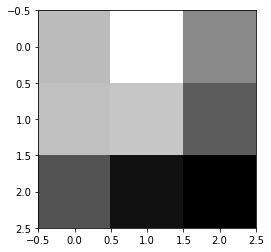

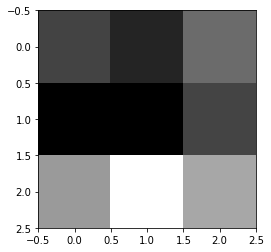

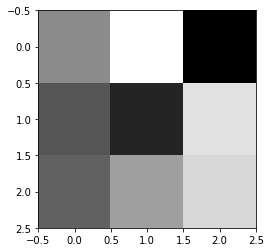

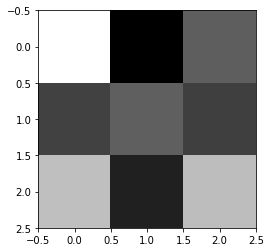

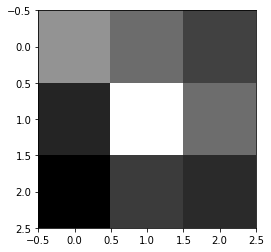

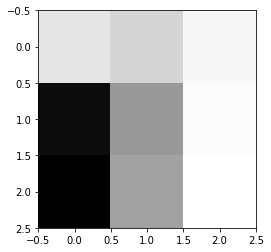

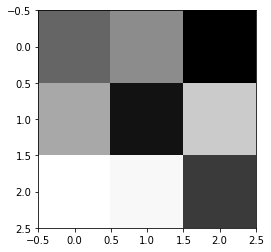

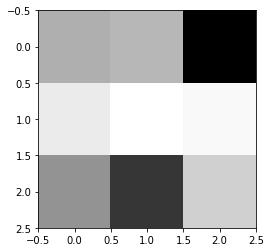

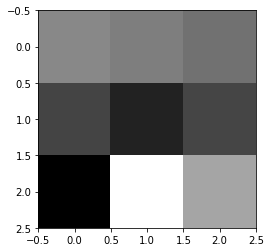

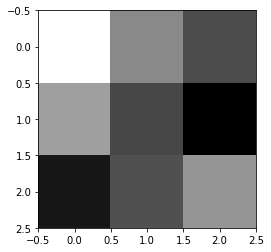

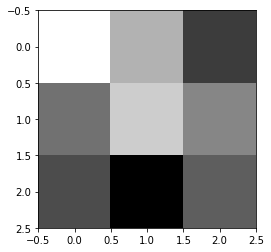

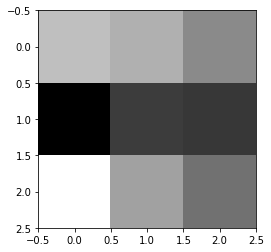

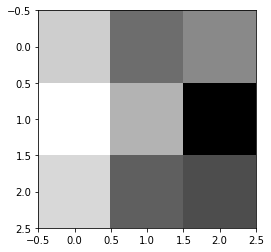

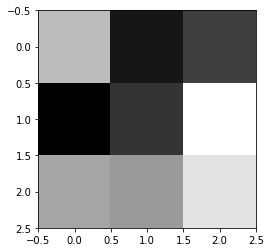

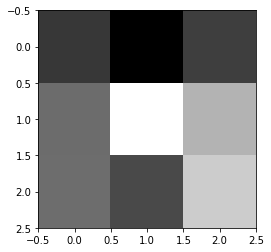

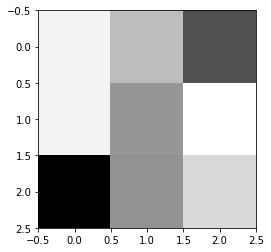

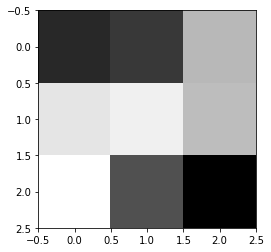

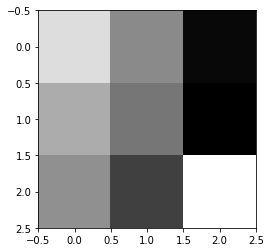

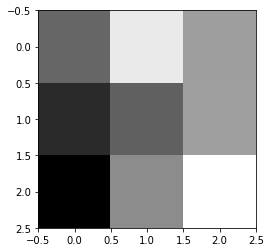

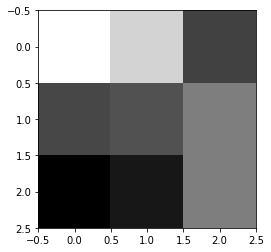

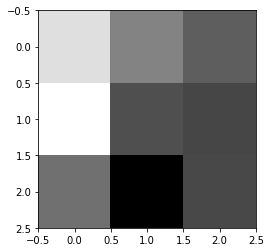

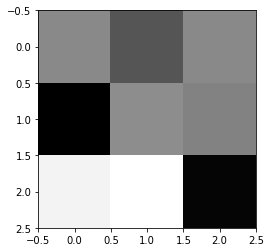

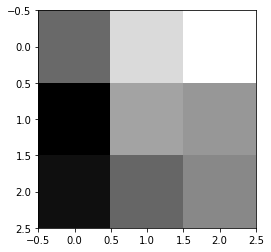

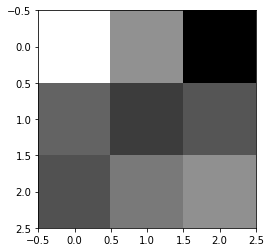

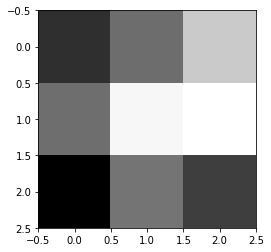

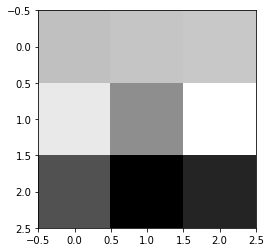

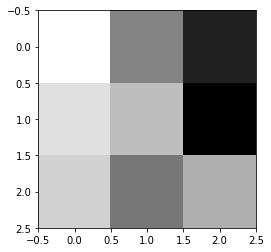

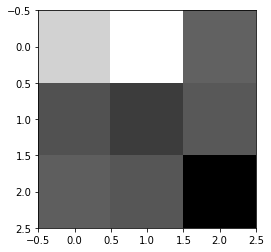

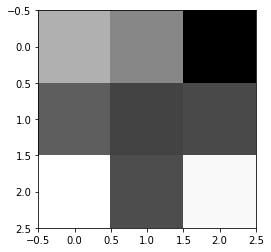

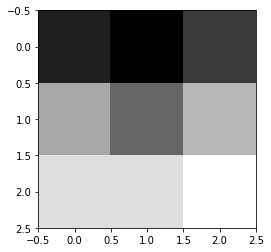

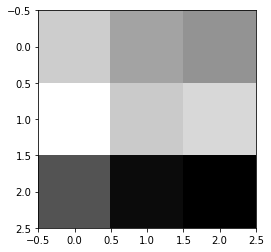

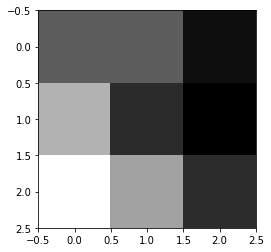

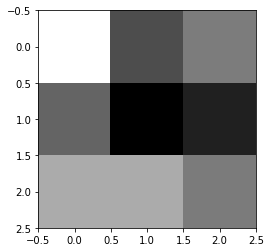

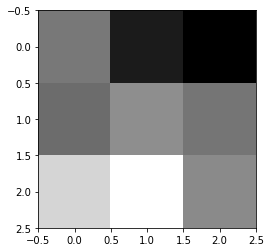

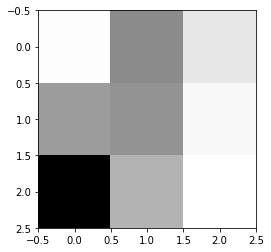

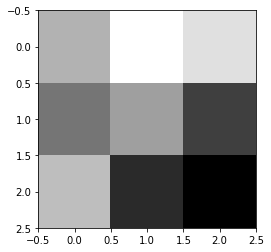

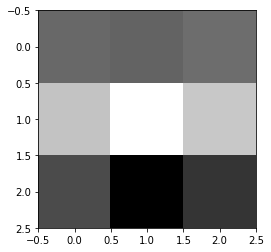

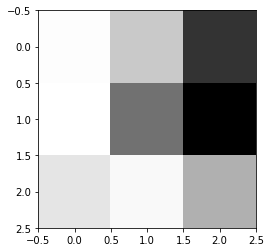

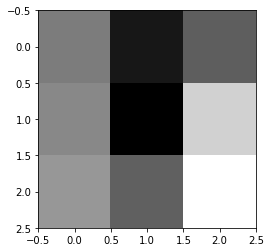

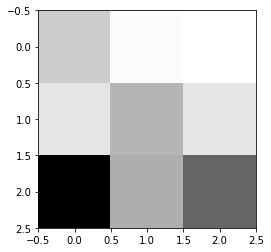

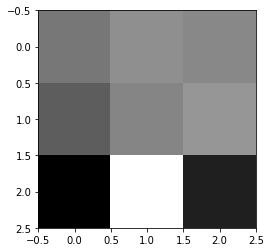

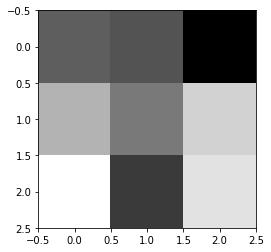

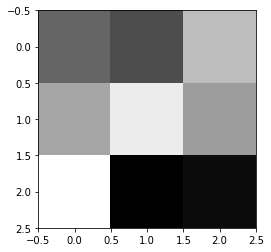

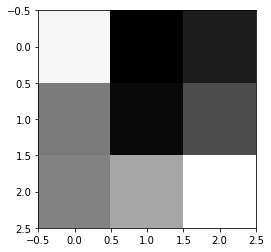

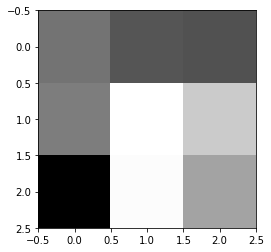

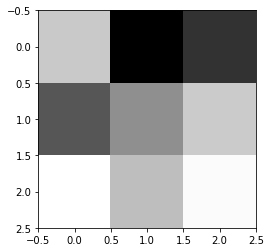

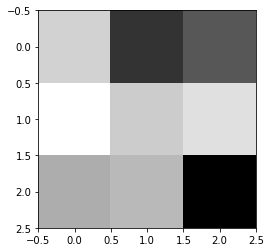

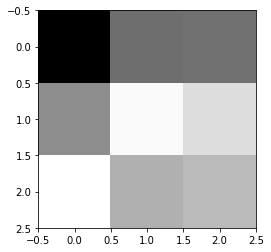

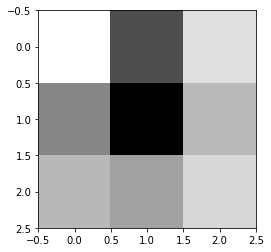

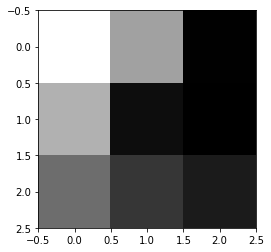

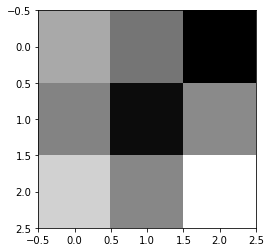

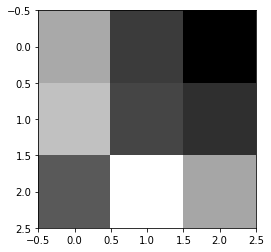

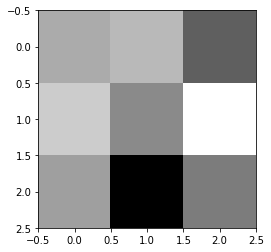

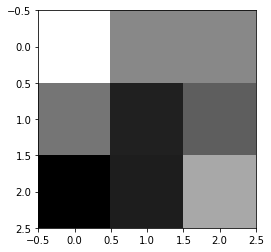

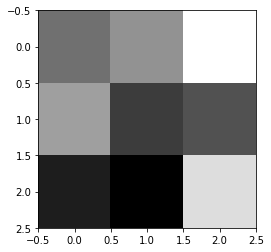

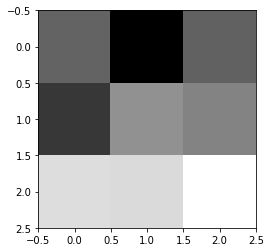

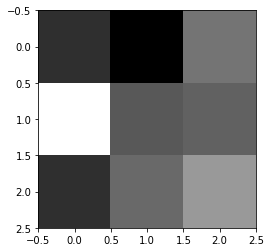

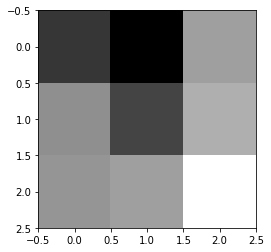

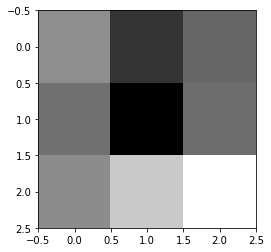

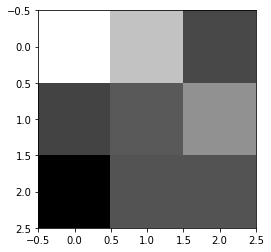

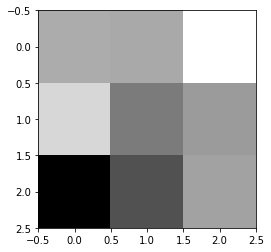

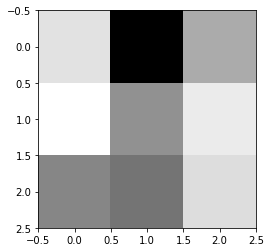

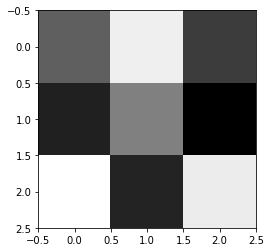

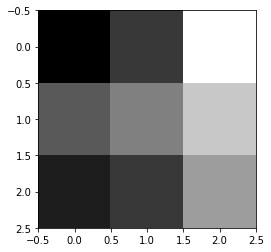

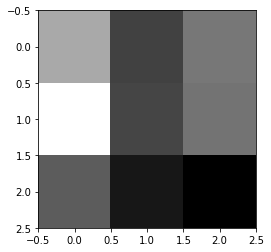

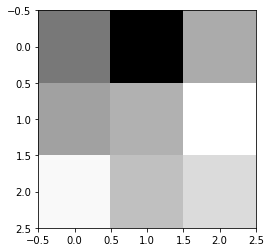

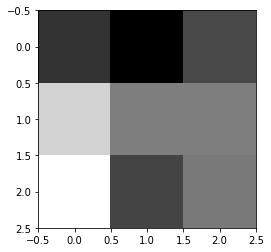

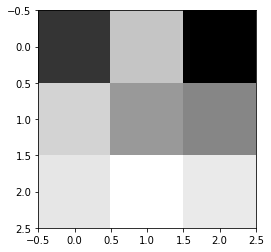

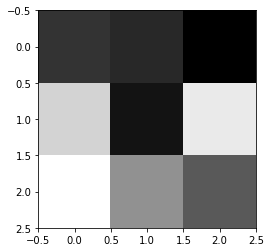

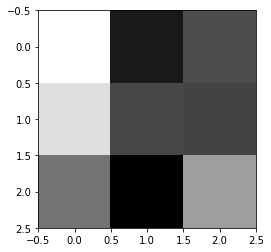

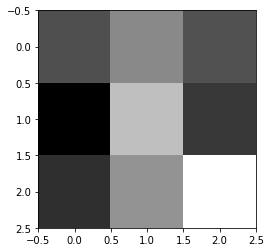

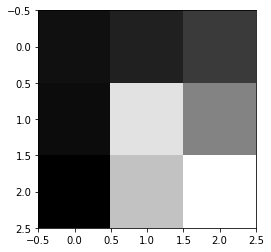

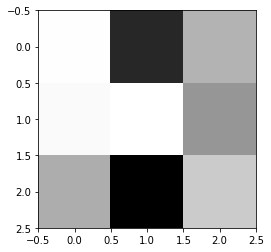

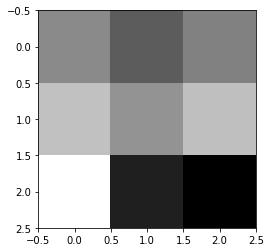

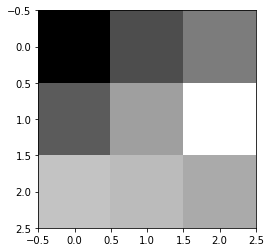

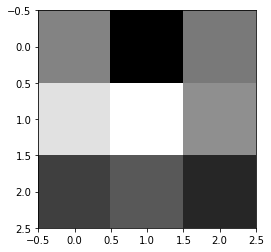

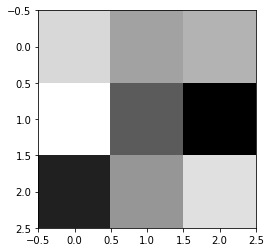

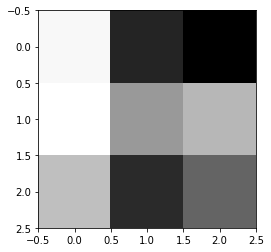

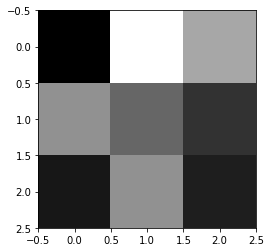

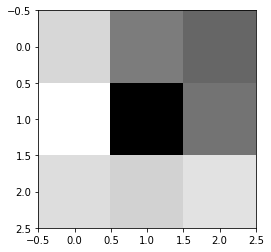

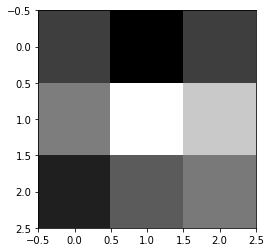

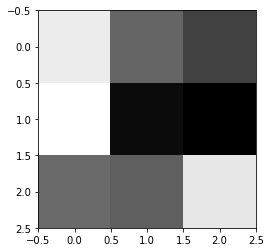

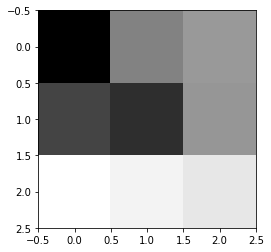

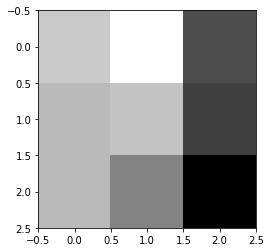

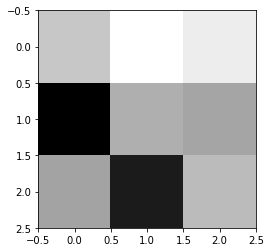

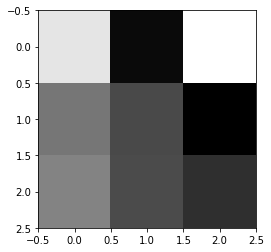

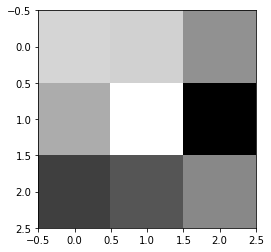

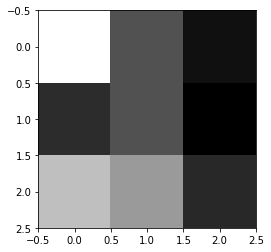

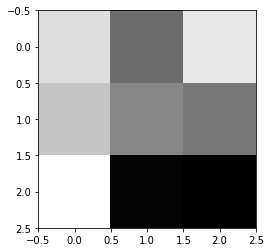

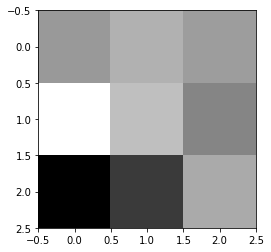

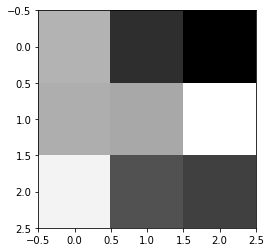

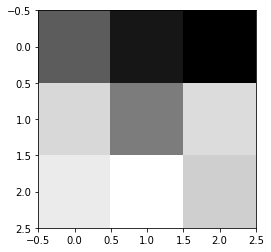

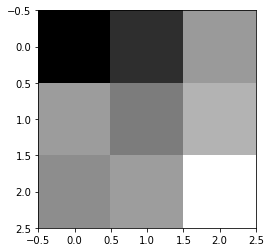

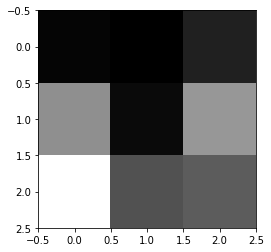

In [0]:
from matplotlib import pyplot
# retrieve weights from the second hidden layer


ix=1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


h,w,c,f = filters.shape
print(layer.name,' - ',f,' filters')
for i in range(f):
		#get the filter
    f = filters[:,:,:,i]
    plt.imshow(f[:,:,0], cmap='gray')
    plt.show()
    

    ix += 1

Observations:




1.   Using design priciples inspired from VGG16 gives good accuracy to the model .However,the model tends to overfit after a certain point and generealization isn't achieved.
2. Using augementation techniques improve the generalization performance of the model.

